In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline




In [2]:
poll_df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

In [3]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


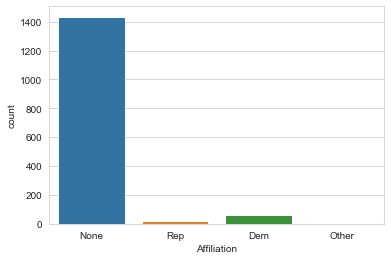

In [4]:
# to countplot the affiliation
sns.countplot('Affiliation', data= poll_df)

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation.

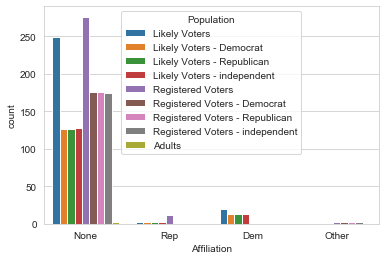

In [5]:
# to countplot affiliation by population
sns.countplot('Affiliation',data= poll_df, hue='Population')

It looks like we have a strong showing of likely voters for both the Republican and Democratic party.

In [6]:
# to take a look at the averages for Trump, Clinton, others and the polled people who remained undecided
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace= True)

avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [7]:
# to calculate the standard deviation for Trump, Clinton, others and the undecided 
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Iteration', axis= 0, inplace= True)
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


In [9]:
# to Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','STD']

poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


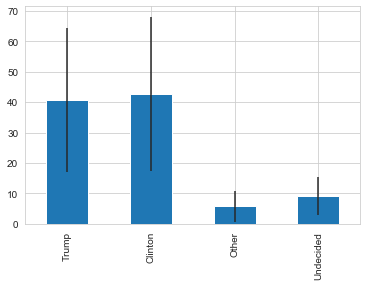

In [10]:

# for a graphical representation of the average polls
avg.plot(yerr=std,kind='bar',legend=False)


Looks like it is a close race especially considering the undecided factor.

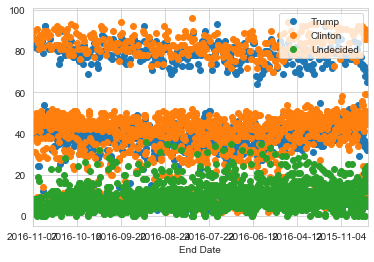

In [11]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided', ],marker='o',linestyle='')

In [12]:
# For timestamps
from datetime import datetime


In [13]:
# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100
# Preview the new column

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


A positive difference indicates a leaning towards Clinton while a negative difference indicates a leaning towards Trump 

In [14]:
# to group the polls by the start date 
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


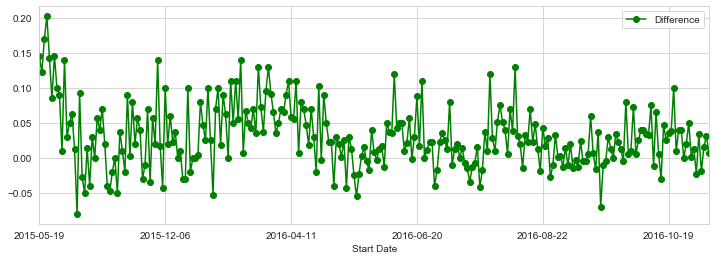

In [15]:
# Plotting the difference in polls between Trump and Clinton
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='green')

This shows that there was a slight leaning towards Clinton when the poll started and towards the end of the poll, there was not so much difference between Clinton and Trump.

In [16]:
# to plot marker lines on the dates of the debate to see if there is a general insight to the poll results.
# Set row count and xlimit list for the month of september 
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
# to find the min and max for the month of october         
row_in2 = 0
xlimit2 = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2016-10':
        xlimit2.append(row_in2)
        row_in2 +=1
    else:
        row_in2 += 1
        
print (min(xlimit))
print (max(xlimit))
print (min(xlimit2))
print (max(xlimit2))

209
231
232
262


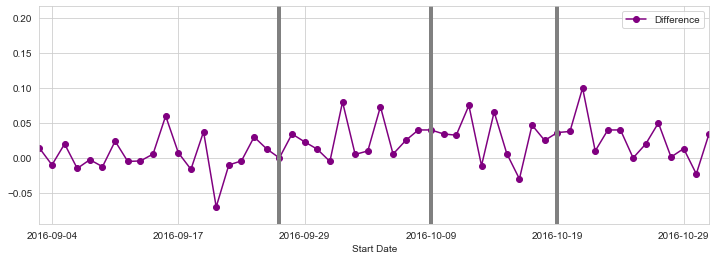

In [18]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(209,262))

# Now add the debate markers
#for the debate on september 26 
plt.axvline(x=209+19, linewidth=4, color='grey')
#for the debate on oct 9
plt.axvline(x=232+8, linewidth=4, color='grey')
# for the debate on oct 19
plt.axvline(x=232+18, linewidth=4, color='grey')

The polls shows a dip for Clinton after the first and third debate.

In [19]:
donor_df= pd.read_csv('Donor_Data.csv')

C:\Users\mider\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048563 entries, 0 to 1048562
Data columns (total 18 columns):
cmte_id              1048559 non-null object
cand_id              1048559 non-null object
cand_nm              1048559 non-null object
contbr_nm            1048559 non-null object
contbr_city          1048528 non-null object
contbr_st            1048559 non-null object
contbr_zip           1048387 non-null object
contbr_employer      1001612 non-null object
contbr_occupation    1039840 non-null object
contb_receipt_amt    1048559 non-null float64
contb_receipt_dt     1048559 non-null object
receipt_desc         49906 non-null object
memo_cd              60252 non-null object
memo_text            77652 non-null object
form_tp              1048559 non-null object
file_num             1048559 non-null float64
tran_id              1048559 non-null object
election_tp          1047645 non-null object
dtypes: float64(2), object(16)
memory usage: 144.0+ MB


In [22]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016


In [23]:
# to take a quick look at the donation amount 
donor_df['contb_receipt_amt'].value_counts()

25.00      210952
50.00      194575
100.00     174995
10.00       58523
35.00       54439
            ...  
1169.00         1
52.14           1
284.50          1
2.25            1
1011.75         1
Name: contb_receipt_amt, Length: 5253, dtype: int64

In [25]:
don_mean= donor_df['contb_receipt_amt'].mean()
don_std= donor_df['contb_receipt_amt'].std()
print('The average donation was %.2f with a standard deviation of %.2f'%(don_mean, don_std))

The average donation was 124.21 with a standard deviation of 552.13


In [27]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(inplace= True)

top_donor

274970   -18100.0
278574   -18100.0
278573   -18100.0
866271   -16600.0
153696   -16300.0
           ...   
150178    18000.0
362095        NaN
566752        NaN
764785        NaN
972098        NaN
Name: contb_receipt_amt, Length: 1048563, dtype: float64

The negative values are due to the FEC recording refunds as well as donations.

In [31]:
# to get rid of the negative values
top_donor= top_donor[top_donor > 0]
top_donor.sort_values(inplace= True)
top_donor.value_counts().head(10)

25.0     210952
50.0     194575
100.0    174995
10.0      58523
35.0      54439
250.0     47187
5.0       33737
500.0     22773
200.0     19504
20.0      17574
Name: contb_receipt_amt, dtype: int64

The top most common donation ranges from 5 to 500 dollars.

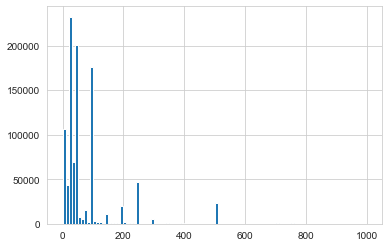

In [33]:
# Create a Series of the common donations limited to 1000
com_don = top_donor[top_donor < 1000]

com_don.hist(bins=100)

In [40]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", nan,
       'Paul, Rand', 'Clinton, Hillary Rodham'], dtype=object)

In [35]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", nan,
       'Paul, Rand', 'Clinton, Hillary Rodham'], dtype=object)

In [41]:
party_map={ 'Carson, Benjamin S.': 'Republican',
           'Clinton, Hillary Rodham':'Democrat',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican',
           'Rubio, Marco' :'Republican',
           'Perry, James R. (Rick)':'Republican',
          'Santorum, Richard J.': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [44]:
donor_df= donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016,Republican
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016,Republican
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016,Republican
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016,Republican
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016,Republican


In [45]:
# Groupby candidate and then display the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Carson, Benjamin S.          244904
Clinton, Hillary Rodham      103398
Cruz, Rafael Edward 'Ted'    541088
Paul, Rand                    32196
Perry, James R. (Rick)          875
Rubio, Marco                  99259
Santorum, Richard J.              2
Name: contb_receipt_amt, dtype: int64

In [46]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Carson, Benjamin S.          2.901400e+07
Clinton, Hillary Rodham      9.493156e+06
Cruz, Rafael Edward 'Ted'    6.975275e+07
Paul, Rand                   6.314863e+06
Perry, James R. (Rick)       1.189868e+06
Rubio, Marco                 4.054208e+07
Santorum, Richard J.         3.500000e+02
Name: contb_receipt_amt, dtype: float64

In [55]:
cand_amount= donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
    print( " The candidate %s raised %.0f dollars" %(cand_amount.index[i],don))
    print ('\n')
    i +=1
    

 The candidate Carson, Benjamin S. raised 29014000 dollars


 The candidate Clinton, Hillary Rodham raised 9493156 dollars


 The candidate Cruz, Rafael Edward 'Ted' raised 69752747 dollars


 The candidate Paul, Rand raised 6314863 dollars


 The candidate Perry, James R. (Rick) raised 1189868 dollars


 The candidate Rubio, Marco raised 40542078 dollars


 The candidate Santorum, Richard J. raised 350 dollars




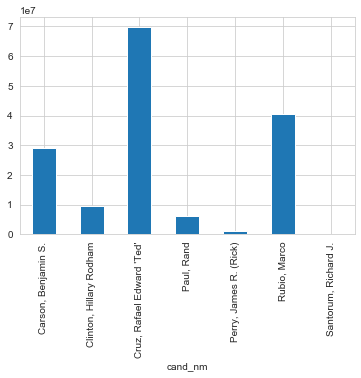

In [56]:
cand_amount.plot(kind='bar')

According to the data, the candidate Ted Cruz received the highest amount in donation.

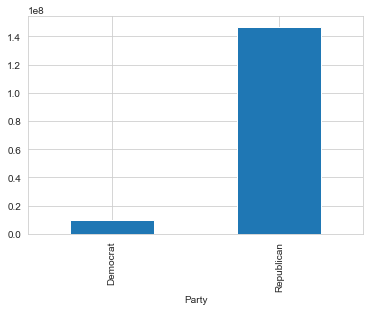

In [58]:
# Groupby party and then count donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')


The data shows a significant difference in donation amount for the republican party as compared to the democratic party. The reason for the significant difference is because the data only accounted for one Democratic presidential candidate while it accounted for six Republican presidential candidate.

In [64]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ARTIST,100.00,NaN
CLERGY,1000.00,NaN
EDUCATOR,110.55,NaN
"MED TECH, RAD SUPERVISOR",56.85,NaN
RETIRED,10.00,NaN


In [65]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
Z,NaN,401.6
ZACARIAS ACTUARIAL CONSULTANTS,NaN,125.0
ZGOLF FOOD & BEVERAGE SERVICES,NaN,500.0
ZONE MANAGER,155.87,NaN
`,NaN,500.0


In [66]:
occupation_df.shape

(27981, 2)

In [67]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]


In [68]:
occupation_df.shape

(18, 2)

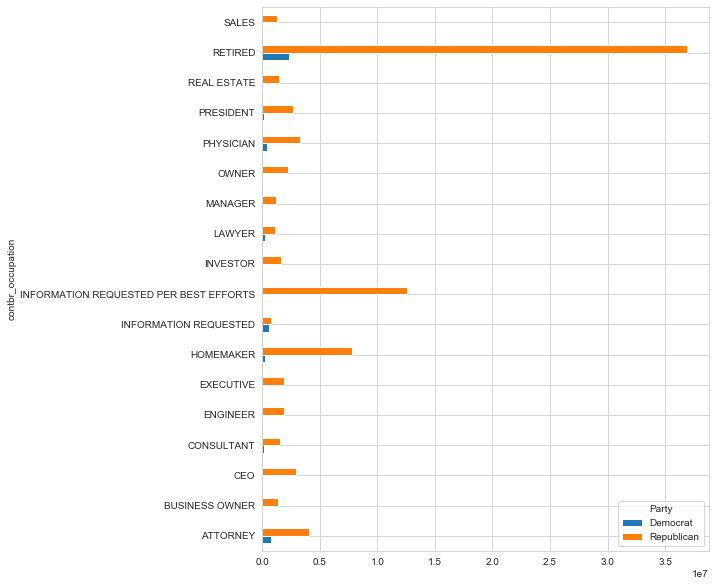

In [72]:
occupation_df.plot(kind= 'barh', figsize=(8,10))

In [73]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

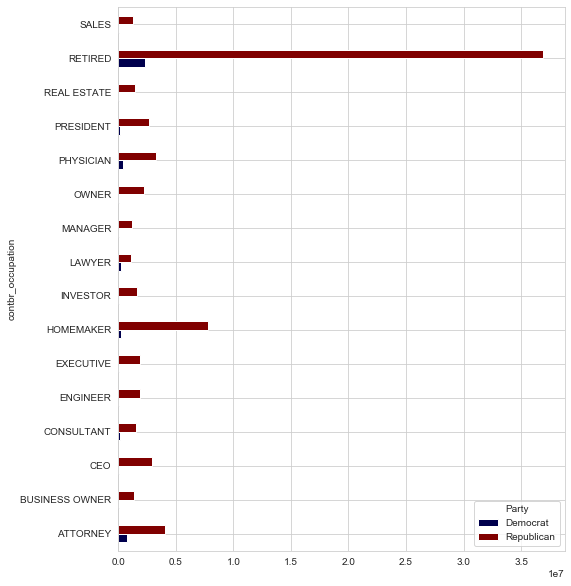

In [75]:
occupation_df.plot(kind= 'barh', figsize=(8,10),cmap='seismic')

The chart shows that the largest donation for both party  came from retired people.